# Heart Disease Prediction using Logistic Regression

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

The dataset has been obtained from Kaggle https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset.

The description of the attributes is given below.

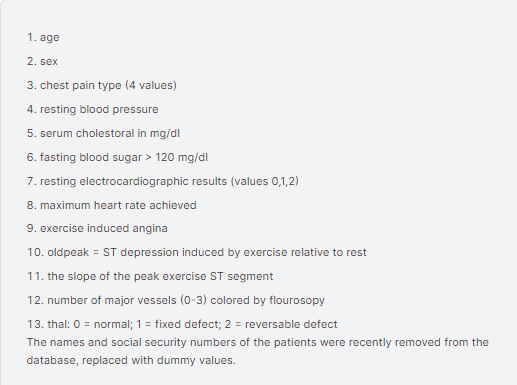

## The Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('heart_disease_data.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**We dont have any missing values**

## Exploratory Data Analysis

In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Checking the distribution of Target Variable

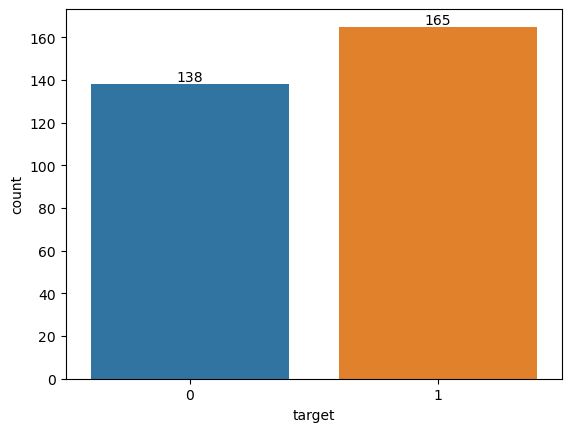

In [25]:
ax = sns.countplot(data,x= 'target')
for container in ax.containers:
    ax.bar_label(container)

**We can see the distribution of 1 and 0 in target variable is almost same which is good. So we can carry on with this dataset.**

1 = Defective Heart
0 = Healthy Heart

## Building and executing the Machine Learning Model

In this model we will be predicting whether the heart of a person is healthy or not. This is represented by the target column. We are using all the other variables as features. Since all the other columns are numeric / binary in nature we dont need any other kind of transformation of these columns.

#### Splitting the Features and Target Variable

In [26]:
y = data['target']
X = data.drop(columns='target',axis=1)

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


#### Training the model

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(303, 13) (242, 13) (61, 13) (242,) (61,)


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#### Evaluating the model Accuracy

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

**Comparing the predicted target values with actual values of y in train set**

In [42]:
accuracy_train_data = accuracy_score(X_train_pred,y_train)
print(f"The accuracy score on fitting the model in training data is {accuracy_train_data}")

The accuracy score on fitting the model in training data is 0.8512396694214877


**Comparing the predicted target values with actual values of y in test set**

In [43]:
accuracy_test_data = accuracy_score(X_test_pred,y_test)
print(f"The accuracy score on fitting the model in test data is {accuracy_test_data}")

The accuracy score on fitting the model in test data is 0.819672131147541


We can see that the accuracy score on test data is pretty close to train data.

#### Building a predicting system

Using this when someone fits values of the features used in this model, this system will predict (using our machine learning model) that whether the heart is healthy or not

In [46]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if (prediction[0]==0):
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')

The Person does not have Heart Disease


## Conclusion

We used Logistic Regression on a dataset from Kaggle to predict whether a person's heart is healthy or not. The model built has pretty good accuracy score. Later this model has been used to build a predicting system which will predict (using our machine learning model) that whether a person has Heart Disease or not.